TRABAJO PRÁCTICO FINAL.

Ciencia de Datos

Integrantes

*   Martín Etchemendigaray
*   Franco Lores

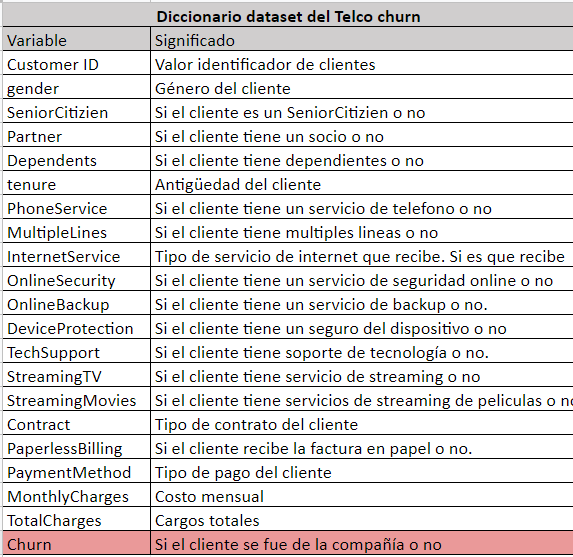

In [3]:
## Importo librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [5]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [6]:
root_path = "/content/gdrive/MyDrive/TP Ciencia de datos/"
telco = pd.read_csv(root_path+"telco_churn_clusterai.csv")
telco.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [7]:
print(f'El tamaño del dataset es de '+str(np.shape(telco)[0]) + ' filas por ' +str(np.shape(telco)[1]) + ' columnas')

El tamaño del dataset es de 7043 filas por 22 columnas


In [8]:
#Saco la columna ID y Unnamed  porque no me sirven para nada
telco = telco.drop('Unnamed: 0', axis=1)
telco = telco.drop('customerID', axis=1)
telco = telco.drop('gender', axis=1)

In [9]:
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,0.0,No,No,34.0,Yes,No,NaN,Yes,No,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,0.0,No,No,2.0,NaN,No,NaN,Yes,NaN,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0.0,No,No,NaN,No,NaN,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


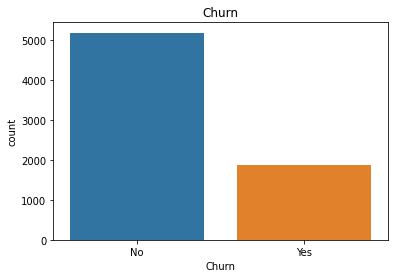

In [10]:
sns.countplot(x=telco['Churn'])
plt.title('Churn')
plt.show()

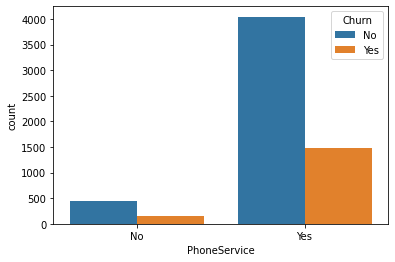

In [11]:
sns.countplot(x="PhoneService", hue="Churn", data=telco)


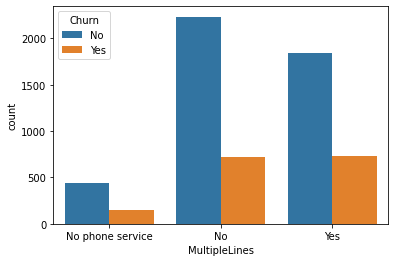

In [12]:
sns.countplot(x="MultipleLines", hue="Churn", data=telco)


In [13]:
#Cantidad de nulos
cant_NaN = telco.isnull().sum()
print(cant_NaN,)

SeniorCitizen        916
Partner              916
Dependents           916
tenure               916
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges      1197
TotalCharges           0
Churn                  0
dtype: int64


In [14]:
total = telco.isnull().sum().sort_values(ascending=False)
percent = (telco.isnull().sum()/telco.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PaperlessBilling,1197,0.169956
MonthlyCharges,1197,0.169956
PaymentMethod,1197,0.169956
Contract,1197,0.169956
SeniorCitizen,916,0.130058
Dependents,916,0.130058
tenure,916,0.130058
PhoneService,916,0.130058
MultipleLines,916,0.130058
InternetService,916,0.130058


In [15]:
telco.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6127 non-null   float64
 1   Partner           6127 non-null   object 
 2   Dependents        6127 non-null   object 
 3   tenure            6127 non-null   float64
 4   PhoneService      6127 non-null   object 
 5   MultipleLines     6127 non-null   object 
 6   InternetService   6127 non-null   object 
 7   OnlineSecurity    6127 non-null   object 
 8   OnlineBackup      6127 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          5846 non-null   object 
 14  PaperlessBilling  5846 non-null   object 
 15  PaymentMethod     5846 non-null   object 
 16  MonthlyCharges    5846 non-null   float64


In [16]:
#Vemos que la variable "TotalCharges" por alguna razon esta como object y no como numoro. Intento de cambiarlo:
pd.to_numeric(telco['TotalCharges'])

ValueError: ignored

In [ ]:
#Hay algun problema en la linea 488, no se que pero no hay numero ahi 
telco.iloc[488]
#Hay un espacio en blanco que lo considera un string

In [17]:
telco = telco.replace('^\s*$',np.nan, regex = True)
#Los cambio por Nans

In [18]:
pd.to_numeric(telco['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [19]:
#Cantidad de nulos
cant_NaN = telco.isnull().sum()
print(cant_NaN,)

SeniorCitizen        916
Partner              916
Dependents           916
tenure               916
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges      1197
TotalCharges          11
Churn                  0
dtype: int64


In [20]:
telco.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6127 non-null   float64
 1   Partner           6127 non-null   object 
 2   Dependents        6127 non-null   object 
 3   tenure            6127 non-null   float64
 4   PhoneService      6127 non-null   object 
 5   MultipleLines     6127 non-null   object 
 6   InternetService   6127 non-null   object 
 7   OnlineSecurity    6127 non-null   object 
 8   OnlineBackup      6127 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          5846 non-null   object 
 14  PaperlessBilling  5846 non-null   object 
 15  PaymentMethod     5846 non-null   object 
 16  MonthlyCharges    5846 non-null   float64


In [21]:
telco['TotalCharges'] = telco['TotalCharges'].astype(float)

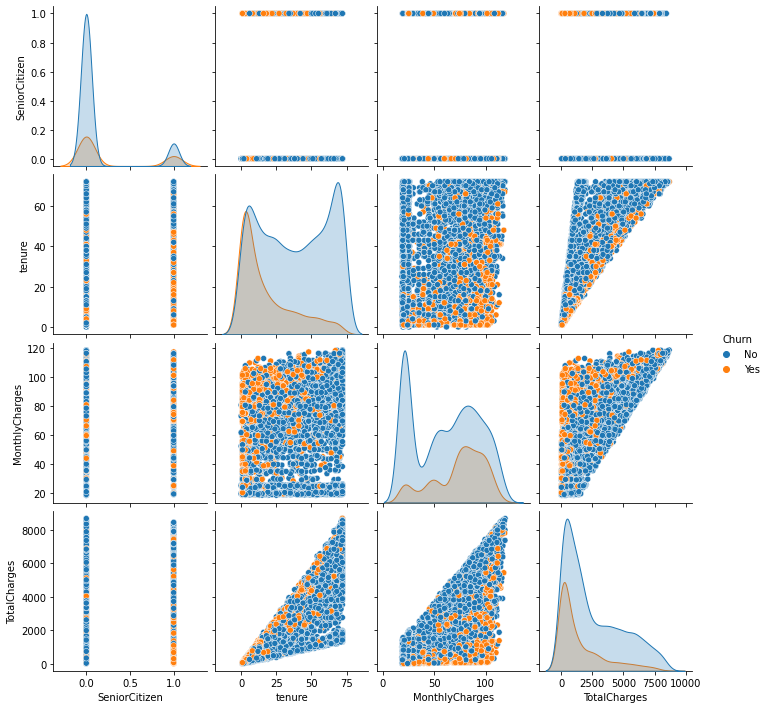

In [22]:
sns.pairplot(telco, hue="Churn")
plt.show()


In [23]:
telco2 = telco[['tenure', 'MonthlyCharges','TotalCharges']]
telco2.head(20)

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,NaN,1889.50
2,2.0,53.85,108.15
3,NaN,42.30,1840.75
4,2.0,NaN,151.65
5,8.0,99.65,820.50
6,22.0,89.10,1949.40
7,10.0,29.75,301.90
8,28.0,104.80,3046.05
9,62.0,56.15,3487.95


In [24]:
#Vemos que la variable tenure es bastante importante para nuestro analisis, ya que pareceria ser que los de mayor tenure no suelen abandonar la compañía.
#Queremos dropear la menor cantidad posible de tenures, por eso vamos a calcular el tenure haciendo la division de total y monthly charges.

In [25]:
telco['MonthlyCharges']=telco['MonthlyCharges'].fillna(telco['TotalCharges']/telco['tenure']) 
telco['tenure']=telco['tenure'].fillna(telco['TotalCharges']/telco['MonthlyCharges']) 


Text(0.5, 1.0, 'Relacion entre cargos mensuales y totales')

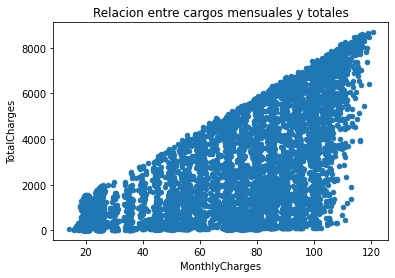

In [26]:
telco[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')
plt.title('Relacion entre cargos mensuales y totales',size=12)

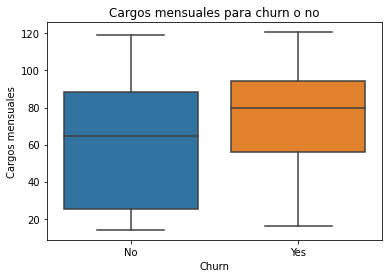

In [27]:
sns.boxplot(data=telco, x=telco['Churn'],y=telco['MonthlyCharges'])
plt.title('Cargos mensuales para churn o no',size=12)
plt.ylabel('Cargos mensuales',size=10)
plt.show()

#Se ve que los que se van normalmente son los que tienen mas cargos mensuales.

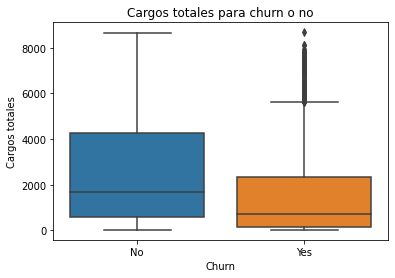

In [28]:
sns.boxplot(data=telco, x=telco['Churn'],y=telco['TotalCharges'])
plt.title('Cargos totales para churn o no',size=12)
plt.ylabel('Cargos totales',size=10)
plt.show()

Text(0.5, 1.0, 'Distribucion de Churn segun antiguedad')

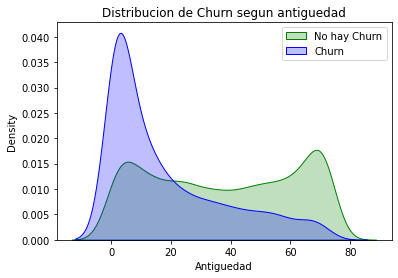

In [29]:
ax = sns.kdeplot(telco.tenure[(telco["Churn"] == 'No') ],
                color="green", shade = True)
ax = sns.kdeplot(telco.tenure[(telco["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["No hay Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Antiguedad')
ax.set_title('Distribucion de Churn segun antiguedad')

Text(0.5, 1.0, 'Churn por tipo de contrato')

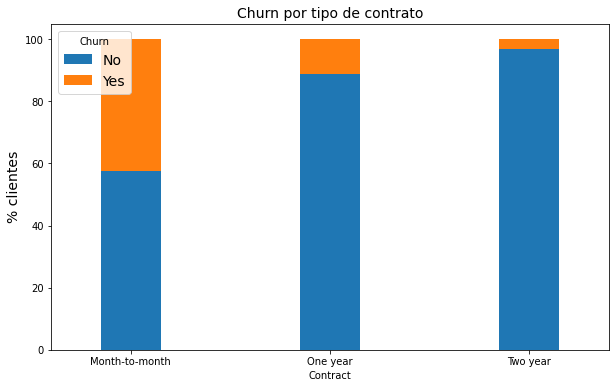

In [30]:
contract_churn = telco.groupby(['Contract','Churn']).size().unstack()

ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.3,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (10,6),
                                                                )
ax.legend(loc='best',prop={'size':14},title = 'Churn')
ax.set_ylabel('% clientes',size = 14)
ax.set_title('Churn por tipo de contrato',size = 14)


    

In [31]:
#Cantidad de nulos
cant_NaN = telco.isnull().sum()
print(cant_NaN,)

SeniorCitizen        916
Partner              916
Dependents           916
tenure               158
PhoneService         916
MultipleLines        916
InternetService      916
OnlineSecurity       916
OnlineBackup         916
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1197
PaperlessBilling    1197
PaymentMethod       1197
MonthlyCharges       158
TotalCharges          11
Churn                  0
dtype: int64


In [32]:
#Vemos que bajo considerablemente la cantidad de nulls en tenure y monthly charges.


In [33]:
#Dropeo estas filas
telco.dropna(subset=['tenure', 'MonthlyCharges','TotalCharges'],inplace=True)

In [34]:
cant_NaN = telco.isnull().sum()
print(cant_NaN,)

SeniorCitizen        886
Partner              897
Dependents           888
tenure                 0
PhoneService         895
MultipleLines        896
InternetService      894
OnlineSecurity       892
OnlineBackup         903
DeviceProtection       0
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract            1173
PaperlessBilling    1165
PaymentMethod       1163
MonthlyCharges         0
TotalCharges           0
Churn                  0
dtype: int64


In [35]:
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,Yes,No,1.000000,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,NaN,Electronic check,29.850000,29.85,No
1,0.0,No,No,34.000000,Yes,No,NaN,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,1889.50,No
2,0.0,No,No,2.000000,NaN,No,NaN,Yes,NaN,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,0.0,No,No,43.516548,No,NaN,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,NaN,NaN,NaN,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,151.65,Yes


In [36]:
print(f'El tamaño del dataset es de '+str(np.shape(telco)[0]) + ' filas por ' +str(np.shape(telco)[1]) + ' columnas')

El tamaño del dataset es de 6875 filas por 19 columnas


gender	Género del cliente

SeniorCitizen	Si el cliente es un SeniorCitizien o no

Partner	Si el cliente tiene un socio o no

Dependents	Si el cliente tiene dependientes o no

PhoneService	Si el cliente tiene un servicio de telefono o no 

MultipleLines	Si el cliente tiene multiples lineas o no (esta se podria hacer lo que dice "no phone service" como no directamente)

OnlineSecurity	Si el cliente tiene un servicio de seguridad online o no

OnlineBackup	Si el cliente tiene un servicio de backup o no.

DeviceProtection	Si el cliente tiene un seguro del dispositivo o no

TechSupport	Si el cliente tiene soporte de tecnología o no.

StreamingTV	Si el cliente tiene servicio de streaming o no

StreamingMovies	Si el cliente tiene servicios de streaming de peliculas o no

PaperlessBilling	Si el cliente recibe la factura en papel o no.

Estas variables se pueden pasara  numero


In [37]:
pd.Series({col:telco[col].unique() for col in telco})

SeniorCitizen                                         [nan, 0.0, 1.0]
Partner                                                [Yes, No, nan]
Dependents                                             [No, nan, Yes]
tenure              [1.0, 34.0, 2.0, 43.516548463356976, 8.0, 22.0...
PhoneService                                           [No, Yes, nan]
MultipleLines                        [No phone service, No, nan, Yes]
InternetService                           [DSL, nan, Fiber optic, No]
OnlineSecurity                    [No, Yes, nan, No internet service]
OnlineBackup                      [Yes, No, nan, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies                        [No, Yes, No internet service]
Contract                    [Month-to-month, One year, nan, Two year]
PaperlessBilling    

In [38]:
telco=telco.replace('No phone service','No')
telco=telco.replace('No internet service','No')
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,NaN,Yes,No,1.000000,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,NaN,Electronic check,29.850000,29.85,No
1,0.0,No,No,34.000000,Yes,No,NaN,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,1889.50,No
2,0.0,No,No,2.000000,NaN,No,NaN,Yes,NaN,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,0.0,No,No,43.516548,No,NaN,NaN,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,NaN,NaN,NaN,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,151.65,Yes


In [39]:
telco.fillna(method='backfill',inplace=True)
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,Yes,No,1.000000,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,29.850000,29.85,No
1,0.0,No,No,34.000000,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,One year,No,Mailed check,55.573529,1889.50,No
2,0.0,No,No,2.000000,No,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,53.850000,108.15,Yes
3,0.0,No,No,43.516548,No,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300000,1840.75,No
4,0.0,No,No,2.000000,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.825000,151.65,Yes


In [40]:
cant_NaN = telco.isnull().sum()
print(cant_NaN,)

SeniorCitizen       0
Partner             1
Dependents          0
tenure              0
PhoneService        2
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        2
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [41]:
telco.dropna(how ='any', inplace = True)

In [42]:
cant_NaN = telco.isnull().sum()
print(cant_NaN,)

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [43]:
print(f'El tamaño del dataset es de '+str(np.shape(telco)[0]) + ' filas por ' +str(np.shape(telco)[1]) + ' columnas')


El tamaño del dataset es de 6873 filas por 19 columnas


**Label encoder**

In [44]:
telco=telco.replace('No','0')
telco=telco.replace('Yes','1')
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,1,0,1.000000,0,0,DSL,0,1,0,0,0,0,Month-to-month,0,Electronic check,29.850000,29.85,0
1,0.0,0,0,34.000000,1,0,Fiber optic,1,0,1,0,0,0,One year,0,Mailed check,55.573529,1889.50,0
2,0.0,0,0,2.000000,0,0,Fiber optic,1,0,0,0,0,0,Month-to-month,1,Mailed check,53.850000,108.15,1
3,0.0,0,0,43.516548,0,0,Fiber optic,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.300000,1840.75,0
4,0.0,0,0,2.000000,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,75.825000,151.65,1


In [45]:
telco['InternetService']=telco['InternetService'].replace('0','No internet service')

In [46]:
pd.Series({col:telco[col].unique() for col in telco})

SeniorCitizen                                              [0.0, 1.0]
Partner                                                        [1, 0]
Dependents                                                     [0, 1]
tenure              [1.0, 34.0, 2.0, 43.516548463356976, 8.0, 22.0...
PhoneService                                                   [0, 1]
MultipleLines                                                  [0, 1]
InternetService               [DSL, Fiber optic, No internet service]
OnlineSecurity                                                 [0, 1]
OnlineBackup                                                   [1, 0]
DeviceProtection                                               [0, 1]
TechSupport                                                    [0, 1]
StreamingTV                                                    [0, 1]
StreamingMovies                                                [0, 1]
Contract                         [Month-to-month, One year, Two year]
PaperlessBilling    

In [47]:
telco.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6873 entries, 0 to 7040
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6873 non-null   float64
 1   Partner           6873 non-null   object 
 2   Dependents        6873 non-null   object 
 3   tenure            6873 non-null   float64
 4   PhoneService      6873 non-null   object 
 5   MultipleLines     6873 non-null   object 
 6   InternetService   6873 non-null   object 
 7   OnlineSecurity    6873 non-null   object 
 8   OnlineBackup      6873 non-null   object 
 9   DeviceProtection  6873 non-null   object 
 10  TechSupport       6873 non-null   object 
 11  StreamingTV       6873 non-null   object 
 12  StreamingMovies   6873 non-null   object 
 13  Contract          6873 non-null   object 
 14  PaperlessBilling  6873 non-null   object 
 15  PaymentMethod     6873 non-null   object 
 16  MonthlyCharges    6873 non-null   float64


In [48]:
telco['Churn'] = telco['Churn'].astype(float)
telco['Partner'] = telco['Partner'].astype(float)
telco['Dependents'] = telco['Dependents'].astype(float)
telco['PhoneService'] = telco['PhoneService'].astype(float)
telco['MultipleLines'] = telco['MultipleLines'].astype(float)
telco['OnlineSecurity'] = telco['OnlineSecurity'].astype(float)
telco['OnlineBackup'] = telco['OnlineBackup'].astype(float)
telco['DeviceProtection'] = telco['DeviceProtection'].astype(float)
telco['TechSupport'] = telco['TechSupport'].astype(float)
telco['StreamingTV'] = telco['StreamingTV'].astype(float)
telco['StreamingMovies'] = telco['StreamingMovies'].astype(float)
telco['PaperlessBilling'] = telco['PaperlessBilling'].astype(float)
telco.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6873 entries, 0 to 7040
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     6873 non-null   float64
 1   Partner           6873 non-null   float64
 2   Dependents        6873 non-null   float64
 3   tenure            6873 non-null   float64
 4   PhoneService      6873 non-null   float64
 5   MultipleLines     6873 non-null   float64
 6   InternetService   6873 non-null   object 
 7   OnlineSecurity    6873 non-null   float64
 8   OnlineBackup      6873 non-null   float64
 9   DeviceProtection  6873 non-null   float64
 10  TechSupport       6873 non-null   float64
 11  StreamingTV       6873 non-null   float64
 12  StreamingMovies   6873 non-null   float64
 13  Contract          6873 non-null   object 
 14  PaperlessBilling  6873 non-null   float64
 15  PaymentMethod     6873 non-null   object 
 16  MonthlyCharges    6873 non-null   float64


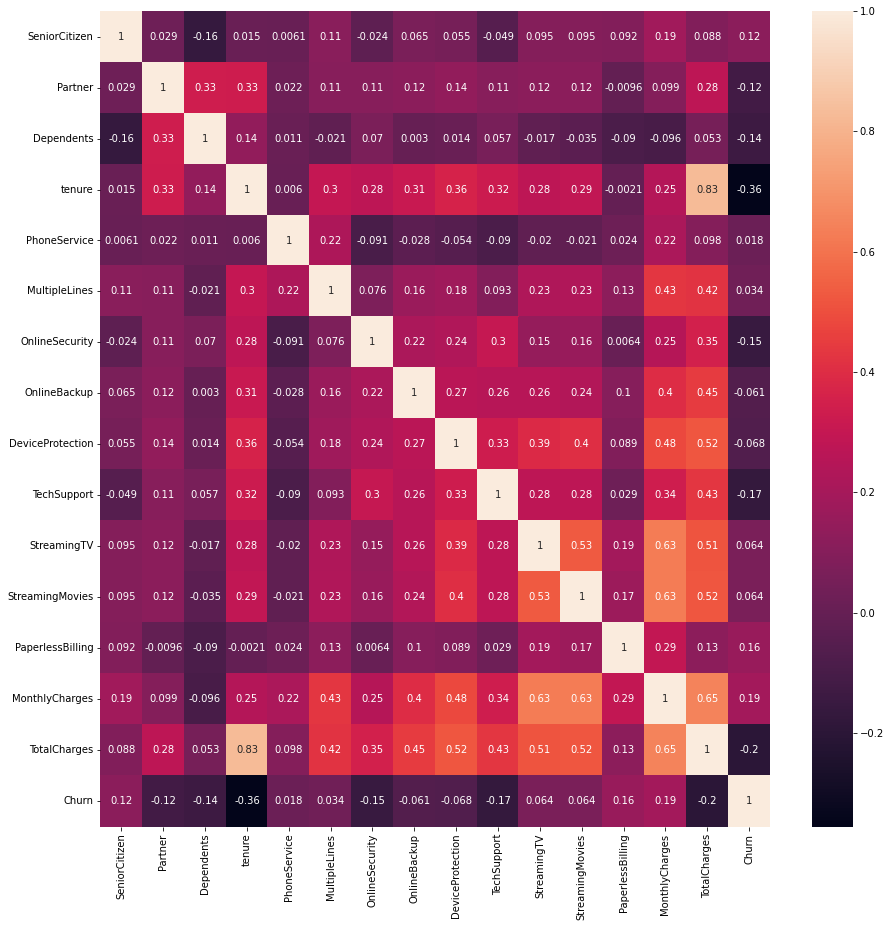

In [49]:
corrmat = telco.corr()
plt.figure(figsize=(15,15))
sns.heatmap(telco.corr(),annot=True,annot_kws={'size':10})

In [50]:
internet_dummies = pd.get_dummies(telco['InternetService'])
Payment_dummies = pd.get_dummies(telco['PaymentMethod'])
contract_dummies = pd.get_dummies(telco['Contract'])

In [51]:
np.shape(internet_dummies)

(6873, 3)

In [52]:
np.shape(Payment_dummies)

(6873, 4)

In [53]:
np.shape(contract_dummies)

(6873, 3)

In [54]:
telco = pd.concat([telco, internet_dummies,Payment_dummies,contract_dummies], axis=1)
telco.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
0,0.0,1.0,0.0,1.000000,0.0,0.0,DSL,0.0,1.0,0.0,...,1,0,0,0,0,1,0,1,0,0
1,0.0,0.0,0.0,34.000000,1.0,0.0,Fiber optic,1.0,0.0,1.0,...,0,1,0,0,0,0,1,0,1,0
2,0.0,0.0,0.0,2.000000,0.0,0.0,Fiber optic,1.0,0.0,0.0,...,0,1,0,0,0,0,1,1,0,0
3,0.0,0.0,0.0,43.516548,0.0,0.0,Fiber optic,1.0,0.0,1.0,...,0,1,0,1,0,0,0,0,1,0
4,0.0,0.0,0.0,2.000000,1.0,0.0,Fiber optic,0.0,0.0,0.0,...,0,1,0,0,0,1,0,1,0,0


In [55]:
#Dividir el DataSet en Train y Test

#Definir atributos que seran la variable x e y
y = np.array(telco[["Churn"]])
x = telco.drop(['Churn','InternetService','PaymentMethod','Contract'], axis=1)

In [56]:
#Dividir DataSet en Train y Test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [57]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4811 entries, 4226 to 2800
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SeniorCitizen              4811 non-null   float64
 1   Partner                    4811 non-null   float64
 2   Dependents                 4811 non-null   float64
 3   tenure                     4811 non-null   float64
 4   PhoneService               4811 non-null   float64
 5   MultipleLines              4811 non-null   float64
 6   OnlineSecurity             4811 non-null   float64
 7   OnlineBackup               4811 non-null   float64
 8   DeviceProtection           4811 non-null   float64
 9   TechSupport                4811 non-null   float64
 10  StreamingTV                4811 non-null   float64
 11  StreamingMovies            4811 non-null   float64
 12  PaperlessBilling           4811 non-null   float64
 13  MonthlyCharges             4811 non-null   fl

In [58]:
#Separar Variables para Scaler
Xtrain1=Xtrain.iloc[:,0:15]
Xtrain1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
4226,0.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,75.85,256.60
578,1.0,1.0,0.0,35.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,94.55,3365.40
6526,0.0,0.0,1.0,49.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,100.60,5069.65
1177,0.0,0.0,0.0,46.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,79.20,3593.80
3710,0.0,1.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.45,242.40


In [59]:
#Separar Variables Dummies
Xtrain2=Xtrain.iloc[:,15:29]
Xtrain2.head()

,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
4226,0,1,0,0,0,1,0,1,0,0
578,0,0,1,0,0,1,0,1,0,0
6526,0,1,0,1,0,0,0,0,1,0
1177,1,0,0,0,0,0,1,1,0,0
3710,1,0,0,0,0,0,1,0,1,0


In [60]:
#Aplicar Scaler
scaler = preprocessing.StandardScaler().fit(Xtrain1)

In [61]:
xtrain_scal = scaler.transform(Xtrain1)
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[-2.21536916e-18  1.47691277e-18 -1.99383225e-17 -7.31071823e-17
  1.30891395e-16 -3.54459066e-17 -2.56613595e-17  6.86764440e-17
  9.45224176e-17 -3.69228194e-18  8.19686590e-17  6.05534238e-17
 -4.43073832e-18 -5.08427223e-16  1.91998661e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [62]:
#Separar Variables para Scaler
Xtest1=Xtest.iloc[:,0:15]
Xtest1.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges
5760,1.0,1.0,1.0,16.821955,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,91.550,1540.05
6626,1.0,1.0,0.0,6.000000,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,95.625,573.75
325,0.0,1.0,0.0,50.030185,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,102.700,5138.10
3304,1.0,0.0,0.0,69.000000,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,109.950,7634.25
293,1.0,0.0,0.0,6.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,89.350,567.80


In [63]:
#Separar Variables Dummies
Xtest2=Xtest.iloc[:,15:29]
Xtest2.head()

,DSL,Fiber optic,No internet service,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,Month-to-month,One year,Two year
5760,0,1,0,0,0,1,0,1,0,0
6626,0,1,0,0,0,0,1,1,0,0
325,0,1,0,0,1,0,0,1,0,0
3304,0,1,0,0,0,1,0,0,0,1
293,0,1,0,0,0,1,0,1,0,0


In [64]:
#Aplicar Scaler
xtest_scal = scaler.transform(Xtest1)
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[-0.00058587  0.01810312 -0.01136271  0.00464272  0.04209775 -0.01226289
  0.05146293 -0.01081687  0.03611642  0.03540226  0.02520199  0.02913354
  0.03244751  0.00990425  0.01020068]
[0.99948219 1.00063821 0.99502331 1.0061692  0.94267879 0.99799008
 1.02315563 0.99647199 1.01161592 1.01608805 1.00586354 1.00644325
 0.99356478 0.99766439 1.01430354]


In [65]:
#Volver a Unificar DataSets Train y Test
xtrain_scal=np.concatenate((xtrain_scal,Xtrain2),axis=1)
xtrain_scal.shape

(4811, 25)

In [66]:
xtest_scal=np.concatenate((xtest_scal,Xtest2),axis=1)
xtest_scal.shape

(2062, 25)

MODELOS

Logistic regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix
lr = LogisticRegression().fit(xtrain_scal,Ytrain)
lr_pred = lr.predict(xtest_scal)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
model = LogisticRegression()
result = model.fit(xtrain_scal, Ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
from sklearn import metrics
prediction_test = model.predict(xtest_scal)
# Print the prediction accuracy
print (metrics.accuracy_score(Ytest, prediction_test))

0.8094083414161009


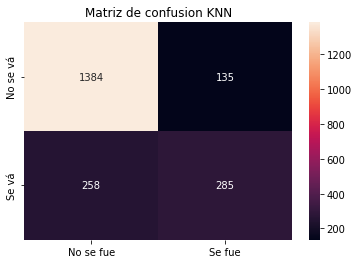

In [70]:
cm = confusion_matrix(Ytest, prediction_test)
df_cm = pd.DataFrame(cm, index = ['No se vá', 'Se vá'], columns = ['No se fue', "Se fue"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Matriz de confusion KNN')
plt.show()

In [71]:
lr_precision = precision_score(Ytest,lr_pred)
lr_recall = recall_score(Ytest,lr_pred)
lr_f1 = f1_score(Ytest,lr_pred)

In [72]:
print('LR Precision',lr_precision)
print('LR recall', lr_recall)
print('LR F1 score',lr_f1)

LR Precision 0.6785714285714286
LR recall 0.5248618784530387
LR F1 score 0.5919003115264798


SVM

In [73]:
svc = svm.SVC()
parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100],
              'gamma':[ 0.01, 0.1,1, 10,]}

clf = GridSearchCV(svc,
                   param_grid = parameters, 
                   refit = True, 
                   cv = 5, 
                   verbose=3)
clf.fit(xtrain_scal, Ytrain.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.780 total time=   0.7s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.789 total time=   0.7s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.788 total time=   0.8s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.799 total time=   0.7s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.798 total time=   0.7s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.780 total time=   0.7s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.783 total time=   0.7s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.783 total time=   0.7s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.801 total time=   0.7s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.804 total time=   0.8s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.780 total time=   0.7s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [74]:
scores = clf.cv_results_

In [75]:
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.669694,0.027781,0.057325,0.001684,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.779855,0.788981,0.787942,0.799376,0.798337,0.790898,0.007233,10
1,0.577860,0.011851,0.159888,0.004392,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.779855,0.782744,0.782744,0.801455,0.803534,0.790067,0.010223,14
2,0.675705,0.018572,0.055676,0.000403,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.779855,0.788981,0.787942,0.799376,0.798337,0.790898,0.007233,10
3,0.908682,0.188133,0.246206,0.054733,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.775701,0.773389,0.782744,0.798337,0.798337,0.785702,0.010767,15
4,0.711093,0.063530,0.056756,0.001655,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.779855,0.788981,0.787942,0.799376,0.798337,0.790898,0.007233,10


In [76]:
print("Los mejores parametros son %s con un score de %0.3f" % (clf.best_params_, clf.best_score_))

Los mejores parametros son {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} con un score de 0.792


In [77]:
Yprediction=clf.predict(xtest_scal)
print(Yprediction)

[1. 1. 0. ... 1. 0. 0.]


In [78]:
test_acc = accuracy_score(Ytest, Yprediction)
print("El accuracy es " + str(test_acc))

El accuracy es 0.8064985451018428


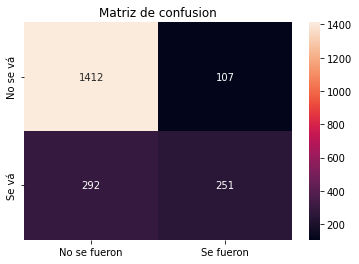

In [79]:
cm = confusion_matrix(Ytest, Yprediction)
df_cm = pd.DataFrame(cm, index = ['No se vá', 'Se vá'], columns = ['No se fueron', "Se fueron"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Matriz de confusion')
plt.show()

KNN

In [80]:
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(xtrain_scal,Ytrain)
predicted_y = knn_model.predict(xtest_scal)
accuracy_knn = knn_model.score(xtest_scal,Ytest)
print("KNN accuracy:",accuracy_knn)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNN accuracy: 0.7759456838021338


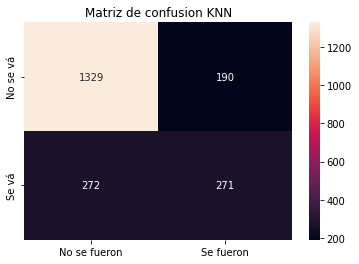

In [81]:
cm = confusion_matrix(Ytest, predicted_y)
df_cm = pd.DataFrame(cm, index = ['No se vá', 'Se vá'], columns = ['No se fueron', "Se fueron"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.title('Matriz de confusion KNN')
plt.show()

PCA

In [99]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 2
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = (pca.fit_transform(xtrain_scal))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [100]:
pca.explained_variance_

array([4.52736352, 1.84801357, 1.37277672, 1.03244683, 0.9854268 ,
       0.87670277, 0.81441535, 0.77076622, 0.68505092, 0.64330238])

In [101]:
pca.explained_variance_ratio_

array([0.2666886 , 0.10885898, 0.0808647 , 0.06081725, 0.05804749,
       0.051643  , 0.0479739 , 0.04540271, 0.04035357, 0.03789433])

In [102]:
xpca.shape

(4811, 10)

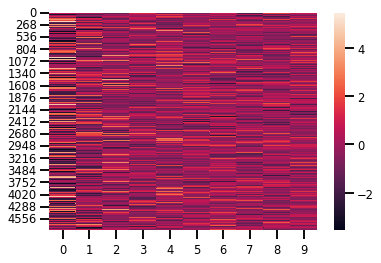

In [103]:
sns.heatmap(xpca)

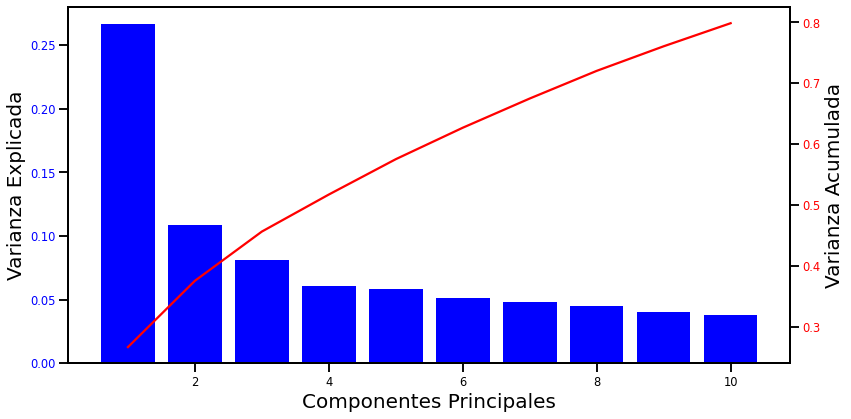

In [104]:
components = range(1,n_comps + 1)
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 
# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20) 
ax2.plot(components, eigenvalues_acum, color='red') 
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#Se ve que si tomamos todas la variables (incluyendo las categoricas mezclado con las continuas) no tiene sentido alguno el PCA.

In [125]:
#Selecciono las variables continuas
traincont=xtrain_scal[: , [3,7,8]]
traincont

array([[-1.197498  ,  1.37017968, -0.71516933],
       [ 0.10864031,  1.37017968, -0.71516933],
       [ 0.68007581, -0.72983129, -0.71516933],
       ...,
       [ 0.27190759, -0.72983129, -0.71516933],
       [-1.15668118, -0.72983129, -0.71516933],
       [-0.50361202,  1.37017968, -0.71516933]])

In [129]:
from sklearn.decomposition import PCA
# cantidad de componentes a extraer
n_comps = 2
# definimos PCA
pca = PCA(n_components= n_comps)
# fit_transform del PCA a nuestros datos
xpca = (pca.fit_transform(traincont))
# obtenemos los auto-valores
eigenvalues = pca.explained_variance_ratio_

In [137]:
xpca.shape

(4811, 2)

In [130]:
pca.explained_variance_

array([1.62204241, 0.7481098 ])

In [131]:
pca.explained_variance_ratio_

array([0.54056842, 0.2493181 ])

In [132]:
xpca.shape

(4811, 2)

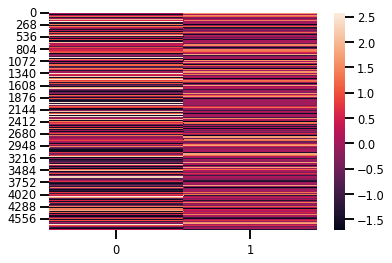

In [133]:
sns.heatmap(xpca)

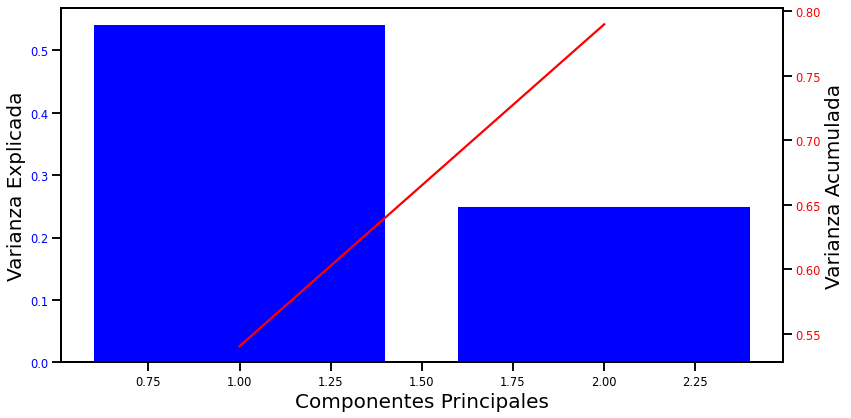

In [134]:
components = range(1,n_comps + 1)
eigenvalues_acum = pca.explained_variance_ratio_.cumsum() 
# Eje Izquierdo
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_xlabel('Componentes Principales',fontsize=20)
ax1.set_ylabel('Varianza Explicada', color='k',fontsize=20)
ax1.bar(components, eigenvalues, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Eje derecho
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Varianza Acumulada', color='k',fontsize=20) 
ax2.plot(components, eigenvalues_acum, color='red') 
ax2.tick_params(axis='y', labelcolor='red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
#Vemos que estas 2 variables luego de realizar el PCA representan el 80% de la varianza de las 3 originales.

In [135]:
xtrain_scal.shape

(4811, 25)

In [136]:
#Borro las columnas continuas originales
xtrain_scal2 = np.delete(xtrain_scal, [3,7,8], axis=1)
xtrain_scal2.shape

(4811, 22)

In [138]:
#Le agrego estos nuevos valores
xtrain_scal3 = np.concatenate((xtrain_scal2, xpca), axis=1)
xtrain_scal3.shape

(4811, 24)

In [ ]:
#Vemos que logramos dismunir la dimensionalidad en 1.

In [139]:


svc = svm.SVC()
parameters = {'kernel':('linear', 'rbf'),
              'C':[1, 10, 100],
              'gamma':[ 0.01, 0.1,1, 10,]}

clf = GridSearchCV(svc,
                   param_grid = parameters, 
                   refit = True, 
                   cv = 5, 
                   verbose=3)
clf.fit(xtrain_scal3, Ytrain.ravel())

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.786 total time=   1.5s
[CV 2/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.788 total time=   1.3s
[CV 3/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.785 total time=   0.9s
[CV 4/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.795 total time=   0.7s
[CV 5/5] END ....C=1, gamma=0.01, kernel=linear;, score=0.793 total time=   0.7s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.7s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.787 total time=   0.7s
[CV 3/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.781 total time=   0.7s
[CV 4/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.802 total time=   0.7s
[CV 5/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.796 total time=   0.7s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.786 total time=   0.7s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ('linear', 'rbf')},
             verbose=3)

In [140]:
scores = clf.cv_results_

In [141]:
scores_df = pd.DataFrame.from_dict(scores)
scores_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.932965,0.312505,0.070082,0.019892,1,0.01,linear,"{'C': 1, 'gamma': 0.01, 'kernel': 'linear'}",0.786085,0.787942,0.784823,0.795218,0.793139,0.789442,0.004047,11
1,0.558408,0.009722,0.156334,0.002912,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.787124,0.786902,0.780665,0.802495,0.796258,0.790689,0.007719,1
2,0.631960,0.007221,0.053956,0.000927,1,0.1,linear,"{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}",0.786085,0.787942,0.784823,0.795218,0.793139,0.789442,0.004047,11
3,0.662138,0.004419,0.176639,0.007653,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.772586,0.767152,0.780665,0.801455,0.795218,0.783415,0.013070,16
4,0.637693,0.013816,0.053862,0.000880,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.786085,0.787942,0.784823,0.795218,0.793139,0.789442,0.004047,11


In [142]:
print("Los mejores parametros son %s con un score de %0.3f" % (clf.best_params_, clf.best_score_))

Los mejores parametros son {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'} con un score de 0.791


In [ ]:
#Mismos hiperparametros, mismo score.